# Objective : Exploratory Data Analysis (hour)

### Importing Required Libraries ->

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Preview the Dataset ->

In [3]:
data = pd.read_csv("G:\My Drive\Prepinsta - Data Analytics\Week 8 - Task 8\Master Datasets\hourly_merged_data.csv", index_col=0)
data.head()

,id,activityday,activitytime,steptotal,calories,totalintensity,averageintensity
0,1503960366,2016-04-12,12:00:00,373,81,20,0.333333
1,1503960366,2016-04-12,1:00:00,160,61,8,0.133333
2,1503960366,2016-04-12,2:00:00,151,59,7,0.116667
3,1503960366,2016-04-12,3:00:00,0,47,0,0.000000
4,1503960366,2016-04-12,4:00:00,0,48,0,0.000000


### 

- The dataset contains information related to physical activities, including Steptotal, calories, totalintensity, averageintensity on hour basis.

### Check for Missing Value ->

In [4]:
data.isnull().sum()

id                  0
activityday         0
activitytime        0
steptotal           0
calories            0
totalintensity      0
averageintensity    0
dtype: int64

- Missing Values: There are no missing values in the dataset after the initial cleaning.

### Check for Duplicate values and remove if any ->

In [5]:
# chek if is there any duplicate values in dataset
duplicates = data.duplicated().sum()
duplicates

0

- Duplicate Rows: There are no duplicate rows in the dataset.


### Descriptive Statistics ->

In [6]:
# Provide summary statistics
summary_statistics = data.describe()
summary_statistics

,id,steptotal,calories,totalintensity,averageintensity
count,2.049300e+04,20493.000000,20493.000000,20493.000000,20493.000000
mean,4.857699e+09,345.256771,99.304836,12.978480,0.216308
std,2.415008e+09,710.860011,62.546188,21.664935,0.361082
min,1.503960e+09,0.000000,42.000000,0.000000,0.000000
25%,2.320127e+09,0.000000,64.000000,0.000000,0.000000
50%,4.445115e+09,74.000000,84.000000,5.000000,0.083333
75%,6.962181e+09,395.000000,112.000000,18.000000,0.300000
max,8.877689e+09,10554.000000,948.000000,180.000000,3.000000


- The data shows a broad spectrum of physical activity, from sedentary periods to highly active hours.

- The wide range in calories burned and steps taken suggests varying patterns of activity, potentially influenced by the time of day, day of the week, or individual habits.

### Histograms ->

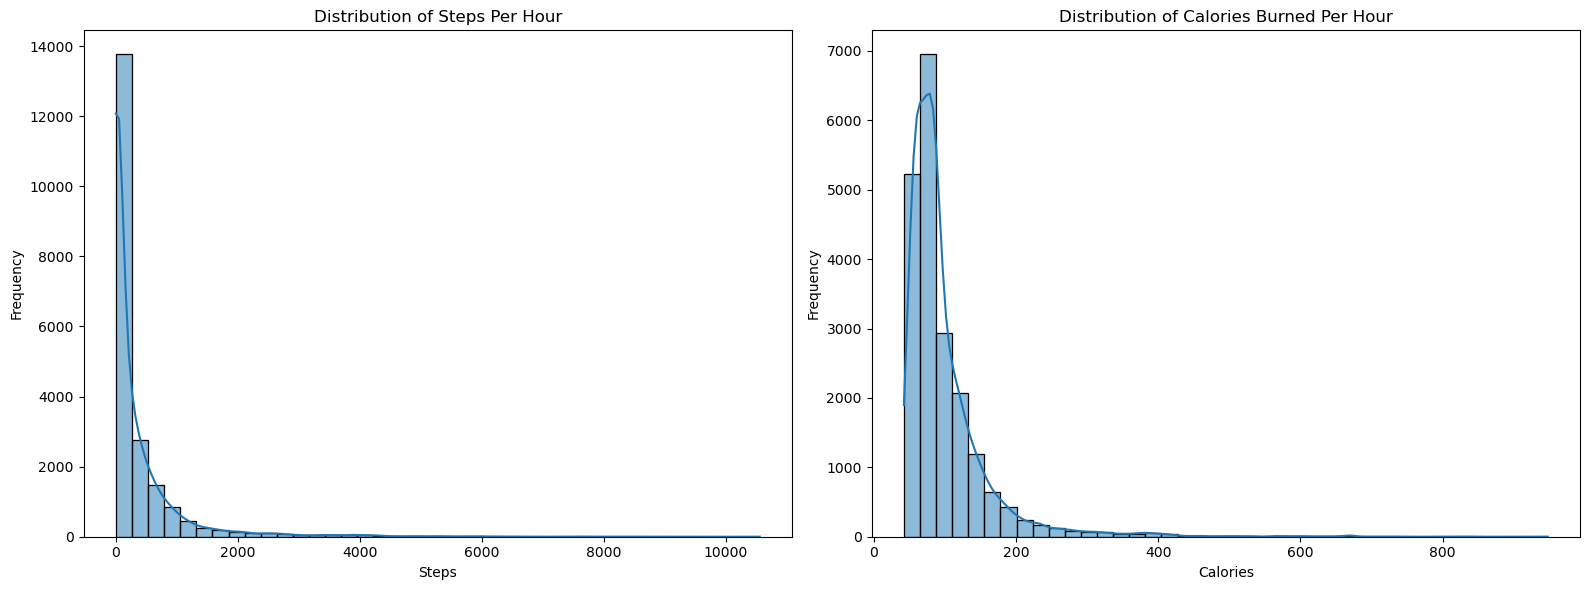

In [7]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(16, 6))

# Histogram of StepTotal
plt.subplot(1, 2, 1)
sns.histplot(data['steptotal'], bins=40, kde=True)
plt.title('Distribution of Steps Per Hour')
plt.xlabel('Steps')
plt.ylabel('Frequency')

# Histogram of Calories Burned
plt.subplot(1, 2, 2)
sns.histplot(data['calories'], bins=40, kde=True)
plt.title('Distribution of Calories Burned Per Hour')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- Activity Variability: The data reveals a considerable amount of variation in the amount of activity performed over the day, with many periods of low activity and fewer moments of high activity.

- Possibility for Targeted treatments: Since reduced activity levels are more common, there may be room for treatments to raise hourly activity levels in order to increase daily calorie expenditure and physical activity.


### Time series of average intensity ->

In [8]:
# Create a copy of the DataFrame to ensure we're not working on a slice/view
data2 = data.copy()

#Lets temporary combine ActivityDay and ActivityTime for better visualization
data2['activitydatetime'] = pd.to_datetime(data2['activityday'].astype(str) + ' ' + data2['activitytime'])
data2.insert(7,'ActivityDateTime',True)

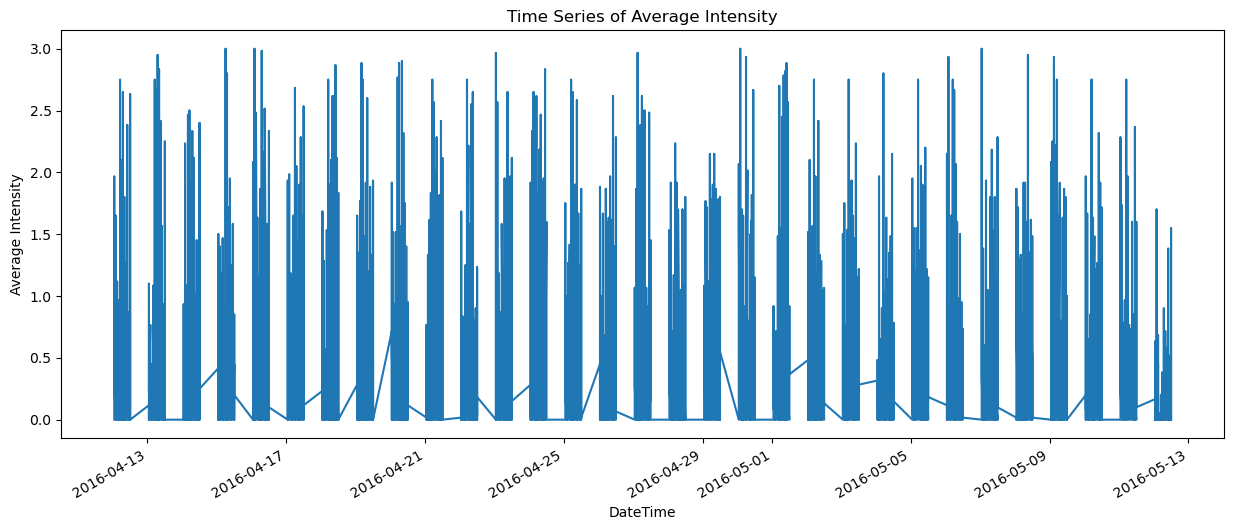

In [9]:
# Plotting time series of Average Intensity
plt.figure(figsize=(15, 6))
data2.set_index('activitydatetime')['averageintensity'].plot()
plt.title('Time Series of Average Intensity')
plt.xlabel('DateTime')
plt.ylabel('Average Intensity')
plt.show()

- The variability in intensity likely reflects natural daily rhythms, with more active periods during the day and less activity at night.

- Identifying specific times of day with consistently higher or lower intensity could inform recommendations for scheduling exercise or physical activities to increase overall daily activity levels.

### Correlation Analysis ->

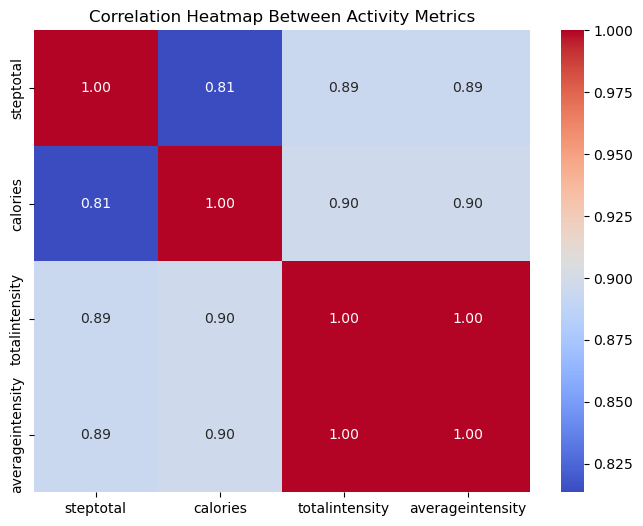

In [10]:
# Calculate the correlation matrix
correlation_matrix = data2[['steptotal', 'calories', 'totalintensity', 'averageintensity']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between Activity Metrics')
plt.show()


- The correlations support the apparent link between steps taken, intensity, and calories in physical activity. Increased activity levels result in increased 
calorie burning, with intensity being a key factor.

- The importance of participating in activities that raise heart rate and overall intensity to maximize health benefits is shown by the substantial association found between average and total intensity with steps taken and calories expended.

### Peak Activity Analysis ->

In [11]:
# Ensure 'ActivityDateTime' is correctly formatted as datetime
data2['activitydatetime'] = pd.to_datetime(data2['activitydatetime'])

# Extract hour from 'ActivityDateTime' and calculate average steps for each hour
hourly_steps = data2.groupby(data2['activitydatetime'].dt.hour)['steptotal'].mean()

# Identify the peak and lowest activity hours based on average steps
peak_activity_hour = hourly_steps.idxmax()
lowest_activity_hour = hourly_steps.idxmin()

peak_activity_hour, lowest_activity_hour


(7, 3)

- The peak activity in the early morning may reflect common exercise routines or commuting activities. Tailoring interventions or recommendations to encourage or leverage this peak could be beneficial.

- The minimal activity during the early hours of the morning underscores typical rest periods. Understanding these low activity times is crucial for defining realistic daily activity goals and recognizing natural rest periods.

- The peak activity hour remains at 7 AM, indicating that this time has the highest average step count, likely reflecting morning routines or exercise activities.

- The lowest activity hour is at 3 AM, consistent with expectations for minimal activity during late-night hours.

### Hourly Patterns in Activity and Sedentariness ->

C:\Users\bhavs\AppData\Local\Temp\ipykernel_7964\2679580814.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['hour'] = pd.to_datetime(data2['activitytime']).dt.hour


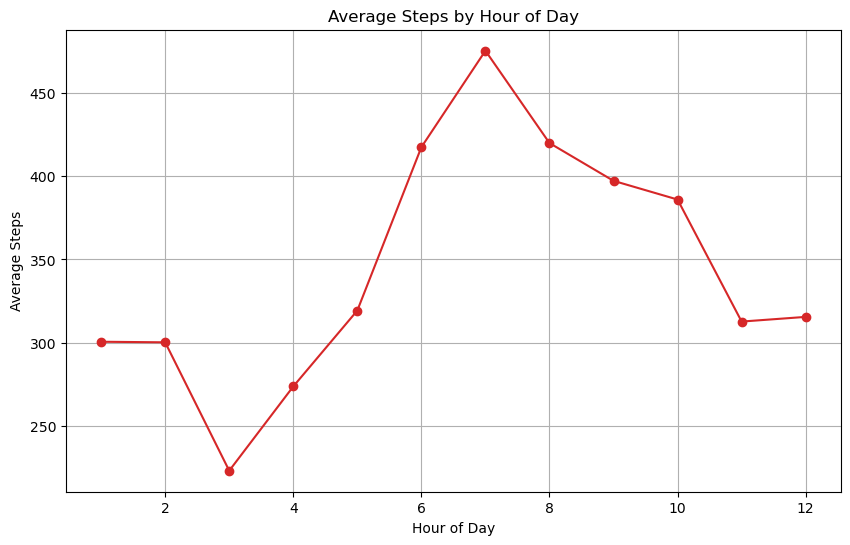

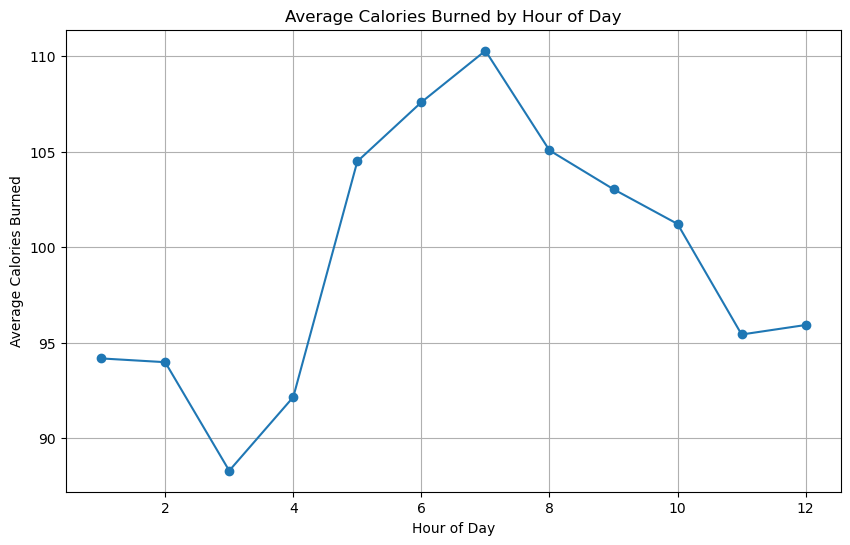

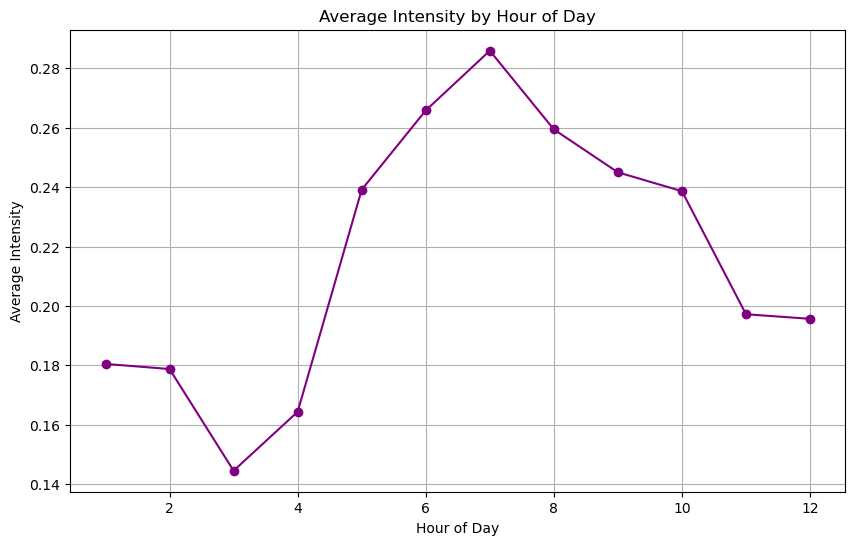

In [12]:
# Convert activitytime to a datetime object to extract the hour
data2['hour'] = pd.to_datetime(data2['activitytime']).dt.hour

# Aggregate data by hour
hourly_patterns = data2.groupby('hour').agg({
    'steptotal': 'mean',
    'calories': 'mean',
    'totalintensity': 'mean',
    'averageintensity': 'mean'
}).reset_index()

# Plot for Average Steps
plt.figure(figsize=(10, 6))
plt.plot(hourly_patterns['hour'], hourly_patterns['steptotal'], color='tab:red', marker='o')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.grid(True)
plt.show()

# Plot for Average Calories Burned
plt.figure(figsize=(10, 6))
plt.plot(hourly_patterns['hour'], hourly_patterns['calories'], color='tab:blue', marker='o')
plt.title('Average Calories Burned by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Calories Burned')
plt.grid(True)
plt.show()

# Plot for Average Intensity
plt.figure(figsize=(10, 6))
plt.plot(hourly_patterns['hour'], hourly_patterns['averageintensity'], label='Average Intensity', color='purple', marker='o')
plt.title('Average Intensity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Intensity')
plt.grid(True)
plt.show()


- **Average Steps by Hour of Day:** Shows the pattern of walking activity throughout the day, with peaks indicating the most active hours.

- **Average Calories Burned by Hour of Day:** Illustrates how calorie expenditure varies by hour, highlighting times of higher physical activity.

- **Average Intensity by Hour of Day:** Provides insight into the average intensity of activity, helping identify not just when people are active, but how intense their activity is at different times.

- **Daily Activity Rhythms:** The analysis highlights clear rhythms in physical activity, with specific hours showing increased movement and exercise. These patterns likely reflect typical daily routines, such as working hours, commuting, and leisure activities.

- **Opportunities for Intervention:** Identifying hours with low activity levels offers opportunities to suggest small interventions, like short walks or stretching exercises, to reduce sedentary behavior and increase overall daily activity.

- **Tailored Exercise Recommendations:** Understanding when people are most active or sedentary can help tailor exercise recommendations to fit into existing routines, potentially enhancing adherence to physical activity guidelines.

### Weekly Activity Trends ->

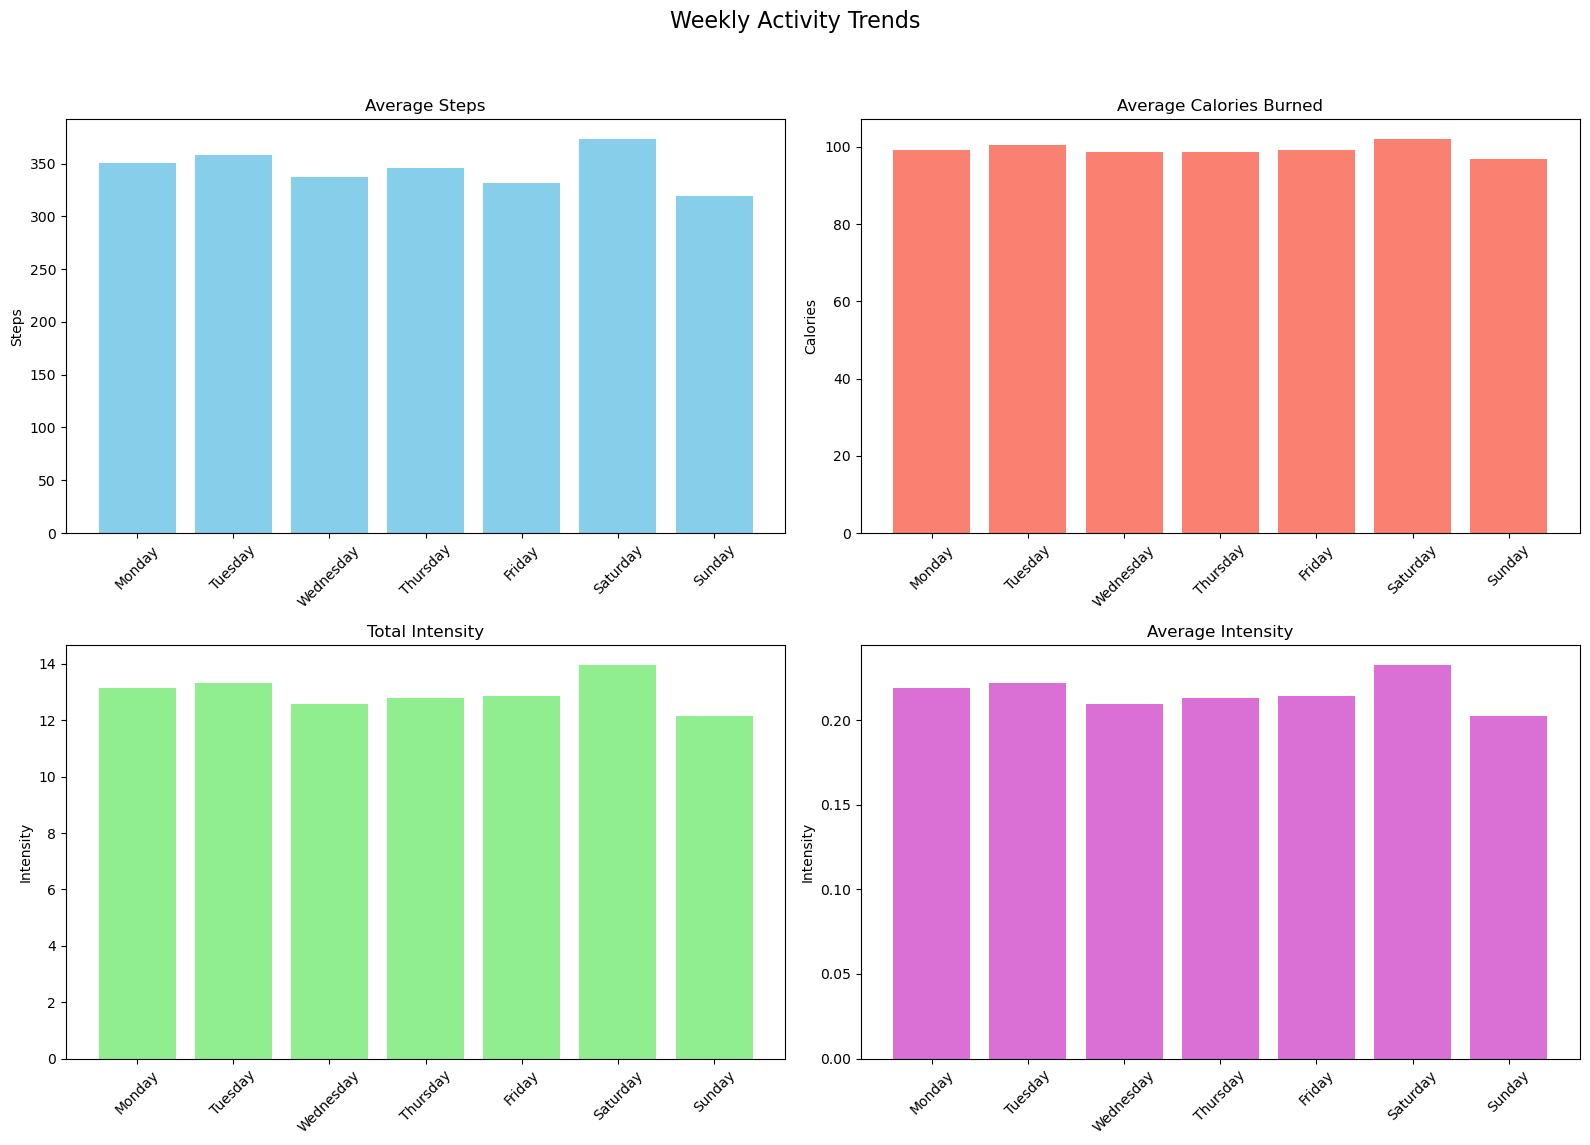

In [13]:
# Convert activityday to datetime format
data2['activityday'] = pd.to_datetime(data2['activityday'])

# Extract day of week from activityday (0 = Monday, 6 = Sunday)
data2['day_of_week'] = data2['activityday'].dt.dayofweek

# Map the day of week to actual names for clarity in visualization
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
        4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data2['day_name'] = data2['day_of_week'].map(days)

# Aggregate data by day of week
weekly_activity = data2.groupby('day_name').agg({
    'steptotal': 'mean',
    'calories': 'mean',
    'totalintensity': 'mean',
    'averageintensity': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the weekly trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Weekly Activity Trends', fontsize=16)

# Average Steps by Day of Week
axes[0, 0].bar(weekly_activity.index, weekly_activity['steptotal'], color='skyblue')
axes[0, 0].set_title('Average Steps')
axes[0, 0].set_ylabel('Steps')
axes[0, 0].tick_params(axis='x', rotation=45)

# Average Calories Burned by Day of Week
axes[0, 1].bar(weekly_activity.index, weekly_activity['calories'], color='salmon')
axes[0, 1].set_title('Average Calories Burned')
axes[0, 1].set_ylabel('Calories')
axes[0, 1].tick_params(axis='x', rotation=45)

# Total Intensity by Day of Week
axes[1, 0].bar(weekly_activity.index, weekly_activity['totalintensity'], color='lightgreen')
axes[1, 0].set_title('Total Intensity')
axes[1, 0].set_ylabel('Intensity')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average Intensity by Day of Week
axes[1, 1].bar(weekly_activity.index, weekly_activity['averageintensity'], color='orchid')
axes[1, 1].set_title('Average Intensity')
axes[1, 1].set_ylabel('Intensity')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit in the figure area
plt.show()


- The analysis of weekly activity trends reveals significant variations in steps, calories burned, total intensity, and average intensity across different days of the week. 

- Activity levels tend to fluctuate, suggesting that certain days may see higher physical engagement due to leisure activities, exercise routines, or errands. 

- Weekends might show distinct patterns compared to weekdays, influenced by free time or relaxation preferences. 

- The data highlights days with potential for increased physical activity interventions, aiming to elevate overall activity levels. 

### User-Specific Activity Patterns ->

In [14]:
# Aggregate data by user ID to calculate average daily activity metrics
user_activity = data2.groupby('id').agg({
    'steptotal': 'mean',
    'calories': 'mean',
    'totalintensity': 'mean',
    'averageintensity': 'mean'
}).reset_index()

# Identify users with the highest and lowest average steps
max_steps_user = user_activity[user_activity['steptotal'] == user_activity['steptotal'].max()]
min_steps_user = user_activity[user_activity['steptotal'] == user_activity['steptotal'].min()]

# Displaying the users with the highest and lowest average steps for further analysis
max_steps_user, min_steps_user


(            id   steptotal    calories  totalintensity  averageintensity
 32  8877689391  678.935616  144.357534       19.212329          0.320205,
            id  steptotal   calories  totalintensity  averageintensity
 4  1927972279  55.905512  93.976378        2.690945          0.044849)

- User IDs like 8877689391 have a higher average step count (around 678 steps) and intensity (0.32), indicating more active daily routines.

- Other users, such as 1927972279, show significantly lower activity levels, with an average of around 55 steps and an intensity of 0.044, suggesting a more sedentary lifestyle.

- **Variability in Activity:** There's significant variation in activity levels among users, reflecting diverse lifestyles and possibly different health and fitness goals.

### Intensity category Analysis ->

In [15]:
# Define intensity categories based on averageintensity quartiles to ensure a broad distribution
intensity_quartiles = data2['averageintensity'].quantile([0.33, 0.66]).to_list()

# Function to categorize intensity
def categorize_intensity(intensity):
    if intensity <= intensity_quartiles[0]:
        return 'Low'
    elif intensity <= intensity_quartiles[1]:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization
data2['intensity_category'] = data2['averageintensity'].apply(categorize_intensity)

# Calculate average steps and calories burned for each intensity category
intensity_analysis = data2.groupby('intensity_category').agg({
    'steptotal': 'mean',
    'calories': 'mean'
}).reset_index()

intensity_analysis


,intensity_category,steptotal,calories
0,High,927.903065,150.215867
1,Low,0.001068,67.791778
2,Medium,120.991265,81.338725


- Steps taken and calories burned are directly correlated with the intensity of the exercise. The number of steps taken and calories burned increase noticeably as the intensity rises from low to high.

- In terms of steps and calories burned, the high intensity category performs noticeably better than the others, suggesting that higher intensity activities play a major role in increasing overall physical activity levels and energy expenditure.

- Low-intensity activities don't add much to steps but still count toward calorie expenditure; these activities are probably related to non-step-based behaviors that nonetheless demand energy, such standing and mild movement.

- Activities with a medium intensity provide a balance between physical activity and without going over and beyond one's comfort zone.


## Conclusion

- We observed significant variability in activity levels across different hours of the day and among individual users. Morning hours typically showed higher activity levels and intensity, suggesting that people tend to be more active during this time.

- Capitalizing on the natural tendency for higher morning activity could be beneficial for individuals looking to enhance their physical fitness or manage weight.